# FEATURE SELECTION

In [2]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from time import time
import pandas as pd
import numpy as np
% matplotlib inline 
import pickle

/home/ubuntu/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
def show_feat_importances(name, trained_model,feat_labels):
    plt.figure(figsize=(12,5))
    importances = trained_model.feature_importances_
    plt.ylabel('Importances')
    indices = np.argsort(importances)[::-1]
    plt.bar(range(len(feat_labels)),importances[indices],color='lightblue',align='center')
    plt.xticks(range(len(feat_labels)),feat_labels[indices],rotation=90)
    plt.xlim([-1,len(feat_labels)])
    plt.tight_layout()
    plt.title('FEATURE IMPORTANCE | MODEL:{}'.format(name))
    plt.grid()
    plt.show()

## LOAD TRAINING DATA

In [4]:
df = pd.read_csv('https://s3.amazonaws.com/marweezys-bucket/all_state_insurance_prediction/train.csv')
ids = list(df['id'])
df.drop(labels='id', axis=1, inplace=True)
one_hot_df = pd.get_dummies(df.ix[:,:-1])

In [5]:
X = one_hot_df
y = df['loss']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

## VIEW FEATURE IMPORTANCE (all features)

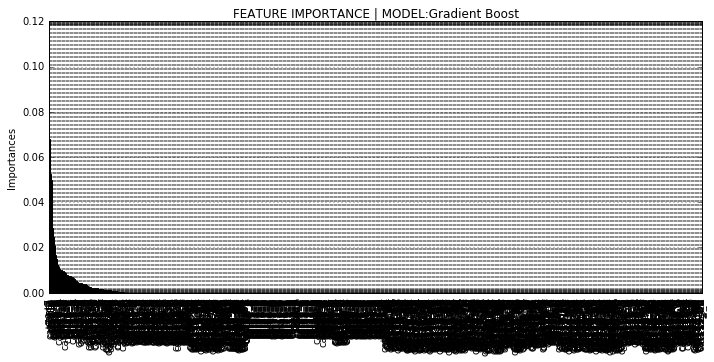

In [21]:
algo = GradientBoostingRegressor()
model = algo.fit(X_train,y_train)
train_score = model.score(X_train,y_train)
CV_score = np.mean(cross_val_score(algo,X_train,y_train,cv=10))
test_score = model.score(X_test,y_test)
print 'train_score:{} \t CV_score:{} \t test_score:{}'.format(train_score,CV_score,test_score)
show_feat_importances(name='Gradient Boost',trained_model=model,feat_labels=one_hot_df.columns)

## VIEW FEATURE IMPORTANCE (all features > 0.0 importance)

In [ ]:
FI = list(model.feature_importances_)
d = dict(zip(list(one_hot_df),FI))
drops = [key for key,val in d.items() if val==0.0]
one_hot_df.drop(labels=drops,axis=1,inplace=True)
X = one_hot_df
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

train_score:0.569309679035 	 CV_score:0.542928033328 	 test_score:0.532649844146


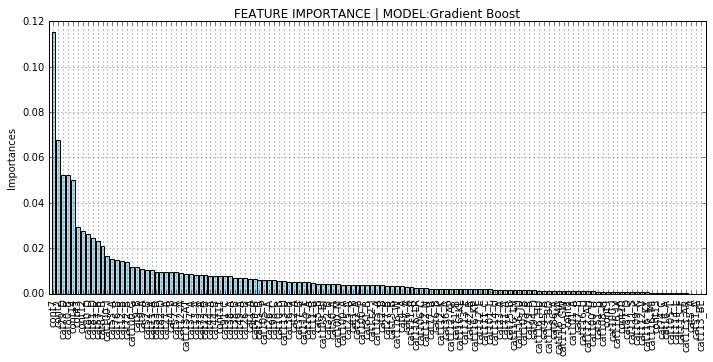

In [30]:
algo = GradientBoostingRegressor()
model = algo.fit(X_train,y_train)
train_score = model.score(X_train,y_train)
CV_score = np.mean(cross_val_score(algo,X_train,y_train,cv=10))
test_score = model.score(X_test,y_test)
print 'train_score:{} \t CV_score:{} \t test_score:{}'.format(train_score,CV_score,test_score)
show_feat_importances(name='Gradient Boost',trained_model=model,feat_labels=one_hot_df.columns)

## VIEW FEATURE IMPORTANCE (all features > 0.0025 importance)

In [42]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
feats = one_hot_df.columns
drops = []
for i in indices:
    if importances[i] < 0.0025:
        drops.append(feats[i]) 
print len(feats-drops)
one_hot_df.drop(labels=drops,axis=1,inplace=True)
X = one_hot_df
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

75


train_score:0.568960529289 	 CV_score:0.542041867336 	 test_score:0.531749872695


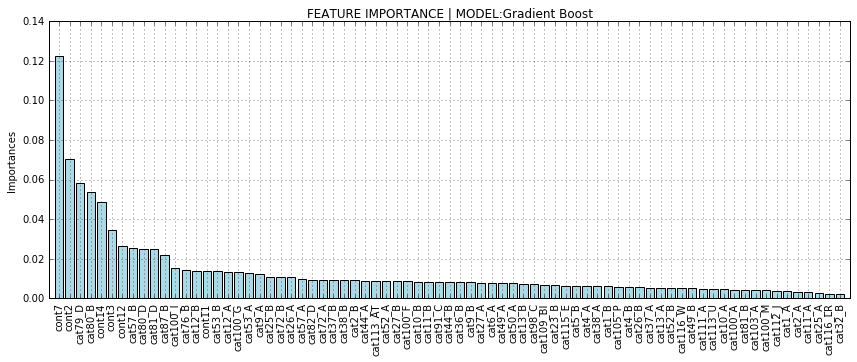

In [51]:
algo = GradientBoostingRegressor()
model = algo.fit(X_train,y_train)
train_score = model.score(X_train,y_train)
CV_score = np.mean(cross_val_score(algo,X_train,y_train,cv=10))
test_score = model.score(X_test,y_test)
print 'train_score:{} \t CV_score:{} \t test_score:{}'.format(train_score,CV_score,test_score)
show_feat_importances(name='Gradient Boost',trained_model=model,feat_labels=one_hot_df.columns)

## SAVE MODEL

In [61]:
feats = list(one_hot_df.columns)
with open('GB_model.plk','wb') as f:
    pickle.dump(model,f)
with open('GB_feats.plk','wb') as f:
    pickle.dump(feats,f)